(200, 2)


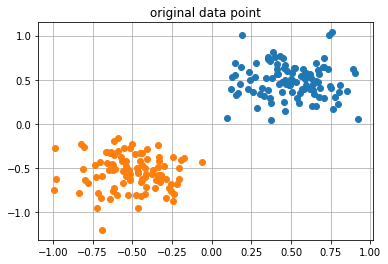

In [1]:
#question 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time

#a. generate two clusters of data pointsx and plot

x1 = list(np.random.normal(0.5, 0.2, [2,100]))
x2 = list(np.random.normal(-0.5, 0.2, [2,100]))
x = np.hstack((x1, x2)).T
print(x.shape)

y1 = [[1] * 100]
y2 = [[-1] * 100]
y = np.hstack((y1, y2)).T
#print(y.shape)

plt.title('original data point')
plt.plot(x1[0], x1[1], 'o')
plt.plot(x2[0], x2[1], 'o')
plt.grid(True)
#print(x)

My implementation converge in 1 epoch.
The collection of W is:
[[0, 0], [0.441316573852135, 0.3302737279931869]]
My implementation converge time is: 0.002850945999966825 s


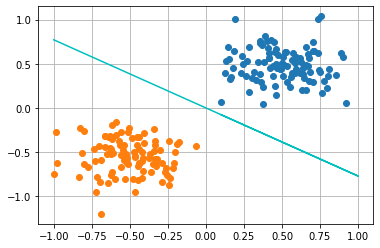

In [2]:
#b. Implement the Perceptron algorithm

#initialize Weights to zero values
W=[0, 0]
#print(W)
# set some learning rate for gradient descent
lr = 1
T = 100
ws = []
ws.append(W)
def perceptron(W, lr, T, x, y, ws):
    for epoch in range(T):
        #print(epoch)
        for i in range(len(x)):
            #print(i)
            # update weights if the prediction is wrong
            inner = x[i].dot(ws[-1])
            #print("i = " + str(i) +"inner"+ str(inner))
            sign = 0
            if inner < 0:
                sign = -1
            else:
                sign = 1
                
            if y[i] != sign: 
                # update weights if the point is incorrectly classified
                # W(t+1) = W(t) + lr * y_i*x_i
                W = W + (lr)*y[i]*x[i,:]
                #print(W)
                ws.append(list(W))
            else:
                continue
        if ws and ws[-1] == list(W):
            #print(ws)
            break
    return epoch, ws

import time
start = time.perf_counter()               
t, ws = perceptron(W, lr, T, x, y, ws)
end = time.perf_counter()
time = end - start
print("My implementation converge in " + str(t+1) + " epoch.")
print("The collection of W is:")
print(ws)
print("My implementation converge time is: " + str(time) + " s")

plt.figure(1)
plt.plot(x1[0], x1[1], 'o')
plt.plot(x2[0], x2[1], 'o')
plt.grid(True)

x1model = np.array([-1,1,0.1])
x2model = np.array([-1,1,0.1])
ymodel = (-ws[-1][0]*x2model - ws[-1][1]* x1model) 
plt.plot(x1model, ymodel, 'c')


My implementation converge in 1 epoch
The collection of W is:
[[0, 0], [1.2213780866052768, 0.9780627851725172], [1.5578969395058595, 0.469949303267887], [1.3421919472639348, -0.20968232365363293], [1.3721505333820185, 0.0676147298475242], [1.3388028332365591, -0.32147048382149473], [1.3708871863985543, 0.0728061988257554], [1.218996396180988, 0.44143199258214944]]
My implementation converge time is: 0.0008596459999807848 s


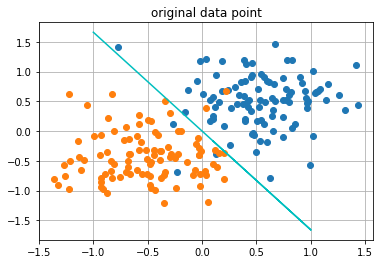

In [3]:
#c. data points from different classes now overlap

x3 = list(np.random.normal(0.5, 0.4, [2,100]))
x4 = list(np.random.normal(-0.5, 0.4, [2,100]))
xc = np.hstack((x3, x4)).T
#print(x.shape)

y3 = [[1] * 100]
y4 = [[-1] * 100]
yc = np.hstack((y3, y4)).T
#print(y.shape)

plt.figure(1)
plt.title('original data point')
plt.plot(x3[0], x3[1], 'o')
plt.plot(x4[0], x4[1], 'o')
plt.grid(True)

#initialize Weights to zero values
#W = np.random.normal([2,1])
W1=[0, 0]
#print(W)
# set some learning rate for gradient descent
lr = 1
T = 100
ws1 = []
ws1.append(W1)

import time
startc = time.perf_counter()               
t1, ws1 = perceptron(W1, lr, T, xc, yc, ws1)
endc = time.perf_counter()
timec = endc - startc
print("My implementation converge in " + str(t1+1) + " epoch")
print("The collection of W is:")
print(ws1)
print("My implementation converge time is: " + str(timec) + " s")

plt.figure(1)
x1model = np.array([-1,1,0.1])
ymodel1 = (-ws1[-1][0]* x1model - ws1[-1][1]* x1model) 
plt.plot(x1model, ymodel1, 'c')

(60000, 28, 28)
(10000, 28, 28)


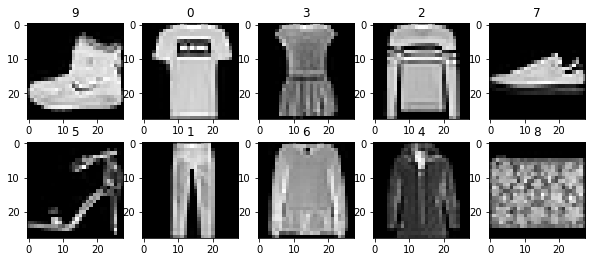

In [26]:
# Question 4
# a. Load the dataset

import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(test_images.shape)

classes = set(train_labels)
plt.figure(figsize=(10,4))
place = 0
for index, (image, label) in enumerate(zip(train_images,train_labels)):
    if label in classes:
        classes.remove(label)
        plt.subplot(2,5,place + 1)
        place += 1
        plt.imshow(np.reshape(image,(28,28)), cmap=plt.cm.gray)
        plt.title(label)
    if not classes:
        break

#In order to reduceing train time, only ues 12000 images to train and 2000 images to test
train_images = train_images.reshape(60000, 784)[:12000]
train_labels = train_labels.reshape(60000, 1)[:12000]
test_images = test_images.reshape(10000, 784)[:2000]
test_labels = test_labels.reshape(10000, 1)[:2000]

In [27]:
# b.c.d. for k-NN method

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(1)
print("K-NN method train-running time:")
%time knn.fit(train_images, train_labels)
print("K-NN method test-running time:")
%time knn_score = knn.score(test_images, test_labels)
print("K-NN test-error is:", 1-knn_score)

K-NN method train-running time:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


CPU times: user 1.67 s, sys: 2 ms, total: 1.68 s
Wall time: 1.68 s
K-NN method test-running time:
CPU times: user 39.6 s, sys: 3.93 ms, total: 39.6 s
Wall time: 39.7 s
K-NN test-error is: 0.1885


In [28]:
# b.c.d. for logistic regression

from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
print("Logistic regression train-running time:")
%time logisticReg.fit(train_images, train_labels)
print("Logistic regression test-running time:")
%time logistic_score = logisticReg.score(test_images, test_labels)
print("Logistic regression test-error is:", 1-logistic_score)

Logistic regression train-running time:


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 12.5 s, sys: 1.65 s, total: 14.2 s
Wall time: 7.22 s
Logistic regression test-running time:
CPU times: user 10.3 ms, sys: 4.99 ms, total: 15.3 ms
Wall time: 7.68 ms
Logistic regression test-error is: 0.16449999999999998


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
# b.c.d. for SVM
from sklearn import svm

#linear kernel
svc = svm.SVC(probability=False,kernel="linear",C=3)
print("SVM with linear kernel train-running time:")
%time svc.fit(train_images,train_labels)
print("SVM with linear kernel test-running time:")
%time svm_linear_score = svc.score(test_images, test_labels)
print("SVM with linear kernel test-error is:", 1-svm_linear_score)

#rbf kernel
svmrbf = svm.SVC(probability=False,kernel='rbf',C=3)
print("SVM with rbf kernel train-running time:")
%time svmrbf.fit(train_images,train_labels)
print("SVM with rbf kernel test-running time:")
%time svm_rbf_score = svmrbf.score(test_images, test_labels)
print("SVM with rbf kernel test-error is:", 1-svm_rbf_score)

SVM with linear kernel train-running time:


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 1min 56s, sys: 103 ms, total: 1min 56s
Wall time: 1min 57s
SVM with linear kernel test-running time:
CPU times: user 10.1 s, sys: 3.05 ms, total: 10.1 s
Wall time: 10.1 s
SVM with linear kernel test-error is: 0.19599999999999995
SVM with rbf kernel train-running time:


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 39.5 s, sys: 5.04 ms, total: 39.6 s
Wall time: 39.6 s
SVM with rbf kernel test-running time:
CPU times: user 13.1 s, sys: 2 ms, total: 13.1 s
Wall time: 13.1 s
SVM with rbf kernel test-error is: 0.126
